# 🌟 Welcome to the Gender and Sentiment Analysis in Parliamentary Debates Notebook! 🌟

👩‍💻 In this Google Colab notebook, we will analyze the **gender distribution** and **sentiment scores** of speakers in parliamentary debates, exploring various trends and visualizing the results using exciting charts and plots. 📊

📈 We will dive into the following topics:

1. **Loading and Preprocessing the Data**: We will load our dataset and perform some initial preprocessing, such as handling missing values, filtering irrelevant data, and preparing the data for further analysis.

2. **Gender Analysis**: We'll investigate the gender distribution of speakers and interventions in parliamentary debates, visualizing the results using stacked bar plots and line plots to reveal trends and patterns.

3. **Sentiment Analysis**: We'll explore sentiment scores per gender, identifying any disparities or trends in how male and female speakers express themselves in parliamentary debates.

4. **Visualizing Sentiment**: Using violin plots, we'll visualize the distribution of sentiment scores per gender, highlighting any differences between male and female speakers in the context of debates.

5. **Top and Flop Speakers**: We'll identify the speakers with the most and least interventions, analyzing their gender distribution using pixel-based visualizations.

🚀 So, let's embark on this exciting journey to uncover hidden insights from parliamentary debates and bridge the gap between data analysis and policymaking. 💡

🔍 *Note: This notebook assumes a good understanding of Python, Pandas, data analysis, and data visualization using libraries such as Seaborn and Matplotlib. Familiarity with sentiment analysis concepts is also helpful.*


# set up Gdrive

In [386]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# install and import libs

In [387]:
import pandas as pd
import seaborn as sns
import numpy as np

# import QAG sentiment dataset

In [388]:
sentiment_df = pd.read_csv('/content/drive/MyDrive/AI/QAG/sentiment/camenbert_sentiment_qag_15.csv', index_col=0)
sentiment_df.head()

,legislature_number,official_date,qag_number,intervention_number,speaker_name,intervention_sentences,sentiment_stars,sentiment_score
0,15,11/04/2018,806,0,M. le président.,"La parole est à Mme Sophie Auconie, pour le gr...",4.0,0.889632
1,15,11/04/2018,806,1,Mme Sophie Auconie.,Madame la ministre des solidarités et de la sa...,4.0,2.656831
2,15,11/04/2018,806,2,Mme Danièle Obono.,Très bien !,4.0,2.782947
3,15,11/04/2018,806,3,Mme Sophie Auconie.,Il est temps de nous préoccuper du mal-être de...,4.0,0.780742
4,15,11/04/2018,806,4,M. Éric Coquerel et Mme Laurence Dumont .,Très bien !,4.0,2.782947


# Tables

Lets check some caracteristics by looking at dataframe extracts

## sentiment sample

### Low star score

In [389]:
set(sentiment_df[sentiment_df.sentiment_stars == 0].intervention_sentences)

{' Ces propos sont inadmissibles\xa0!',
 ' On aurait été malin, avec vos deux points de TVA\xa0!',
 " On voit que vous n'allez jamais faire le plein à la station-service\xa0! ",
 "Le harcèlement est partout, madame la ministre déléguée, et pas seulement dans certains quartiers\xa0! Il n'y a eu que 3\xa0000\xa0verbalisations depuis 2018\xa0: c'est peu\xa0! ",
 " Il n'a pas défendu le Premier ministre\xa0! ",
 ' Et vous continuez le mépris\xa0!',
 " Comparaison n'est pas raison\xa0!",
 '…avec mes excuses et, chers collègues, arrêtez de vous comporter comme des potaches.',
 ' De la dislocation des territoires\xa0!',
 ' Il va redire la même chose\xa0! ',
 ' Vous diminuez les crédits\xa0!',
 ' Il peut compter sur les godillots\xa0!',
 ' Toutes nos propositions ont été balayées\xa0! ',
 ' Encore\xa0? Il va avoir mal à la gorge\xa0!',
 ' Et ça va être pire\xa0!',
 " C'est de l'enfumage macroniste\xa0! ",
 ' Vous êtes fâchés, maintenant\xa0!',
 " L'enfumage\xa0!",
 "En effet, fermer France\xa0

### High star score

In [390]:
set(sentiment_df[sentiment_df.sentiment_stars == 4].intervention_sentences)

{"…là encore pour entendre la demande d'une plus grande justice fiscale et sociale. Je suis heureux de constater l'enthousiasme des députés du groupe Les Républicains. Je le partage\xa0! Nous ne toucherons pas à la situation des 40\xa0% de retraités qui bénéficient du taux réduit.",
 "…et quelle que soit l'orientation professionnelle qu'ils choisissent à tel ou tel moment de leur carrière et de leur vie, relèveront du système universel.",
 "…et les agents de service public – policiers, pompiers, agents municipaux. Et ces violences se concluent parfois de manière tragique, comme ce fut le cas avec le décès de Jean-Mathieu Michel, maire de Signes.Cette violence est symptomatique d'une société qui va mal, d'une société où le maire, les élus locaux et les agents de service public sont exposés en première ligne à la montée des mécontentements et des débordements. Cela ne peut plus durer. Les élus locaux sont dévoués et remplissent leurs fonctions en vue d'une seule mission, l'intérêt généra

### Low sentiment score

In [391]:
set(sentiment_df[sentiment_df.sentiment_score < 0.5].intervention_sentences)

{"Le harcèlement est partout, madame la ministre déléguée, et pas seulement dans certains quartiers\xa0! Il n'y a eu que 3\xa0000\xa0verbalisations depuis 2018\xa0: c'est peu\xa0! ",
 ' De la dislocation des territoires\xa0!',
 "Vous dites ensuite que le CETA a été voté par l'Assemblée nationale uniquement, et non par le Sénat, et qu'il s'applique déjà. Je suis désolé de vous rappeler, monsieur\xa0le député, qu'il s'agit simplement de la règle européenne\xa0: le CETA s'applique avant d'avoir été ratifié par les États. C'est peut-être dommage, mais c'est ainsi\xa0! L'Assemblée nationale a d'ailleurs revendiqué son vote.",
 " Et vous, qu'avez-vous fait depuis quarante ans\xa0?",
 "Le second sujet que vous avez évoqué et sur lequel j'aimerais revenir est assez typique de la désinformation que l'on constate parfois\xa0: il s'agit de l'école publique des savoirs fondamentaux. Vous connaissez les réponses à votre question car vous avez participé aux débats. Par conséquent, rien ne sert d'inq

### High sentiment score

In [392]:
set(sentiment_df[sentiment_df.sentiment_score < 2].intervention_sentences)

{'Nous avons entendu les arguments des partisans de la réouverture, dont plusieurs proposent de permettre, comme en Australie, d’accéder à la plage sans y déposer sa serviette, pour pratiquer un sport. Mais, à ce stade, il semble plus raisonnable de maintenir la règle énoncée par le Premier ministre, car la première phase du déconfinement nous impose une prudence et une vigilance particulières. Nous le savons d’expérience\xa0: dès que l’accès aux plages sera rouvert, on souhaitera s’y rendre en nombre\xa0; or il s’agit d’espaces difficiles à surveiller et à contrôler. De plus, la période qui s’ouvre compte plusieurs jours fériés qui favoriseraient un afflux sur les plages si l’accès en était autorisé.Je le répète, nous sommes bien conscients du caractère contraignant de la mesure et de la déception qu’elle suscite. Nous avons trois semaines devant nous pour y réfléchir puisque nous sommes convenus de la réexaminer en vue de la deuxième étape de la levée du confinement, le 1er\xa0juin. 

In [393]:
sentiment_df.sentiment_stars.describe()

count    57680.000000
mean         2.761182
std          1.605317
min          0.000000
25%          1.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: sentiment_stars, dtype: float64

In [394]:
print(f"Number of 'la parole est à' interventions: {round(len(sentiment_df[sentiment_df.intervention_sentences.str.contains('La parole est à')]) / len(sentiment_df) * 100, 1)}%")
print(f"Numper of president (main) speaker interventions: {round(len(sentiment_df[sentiment_df.speaker_name.str.contains('président')]) / len(sentiment_df) * 100, 1)}%")

Number of 'la parole est à' interventions: 18.1%
Numper of president (main) speaker interventions: 19.8%


# PLOTS!

## Samples per star - Sentiment distribution

We see that there is a divide between poor sentiment and nice sentiment.  
Most bad interventions are below 1.5 and most good interventions are above 2.5.

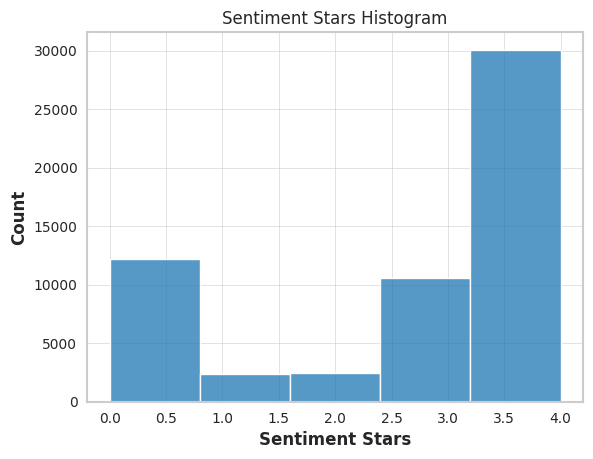

In [395]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid') # set the style of the plot

# plot the histogram using seaborn
sns.histplot(data=sentiment_df, x='sentiment_stars', bins=5, kde=False)

# set the title and labels for the plot
plt.title('Sentiment Stars Histogram')
plt.xlabel('Sentiment Stars')
plt.ylabel('Count')

# show the plot
plt.show()


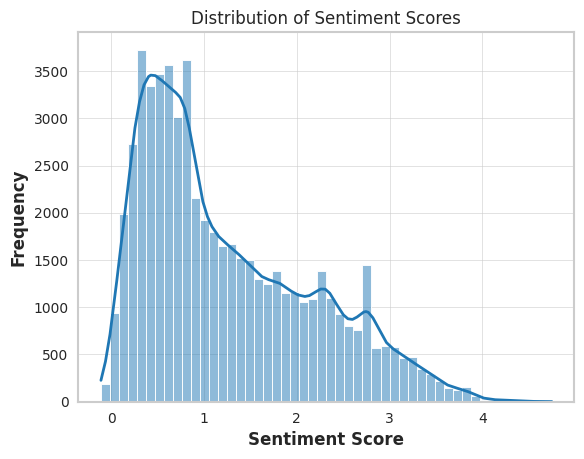

In [396]:
# Distribution of sentiment scores
sns.histplot(data=sentiment_df, x='sentiment_score', bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


## Top 20 Most positive sentiment people

We see that most of the positive scores (and negatives scores just below) are held by multiple speakers at the same time (Eg. M. XXX et M. YYY ).  

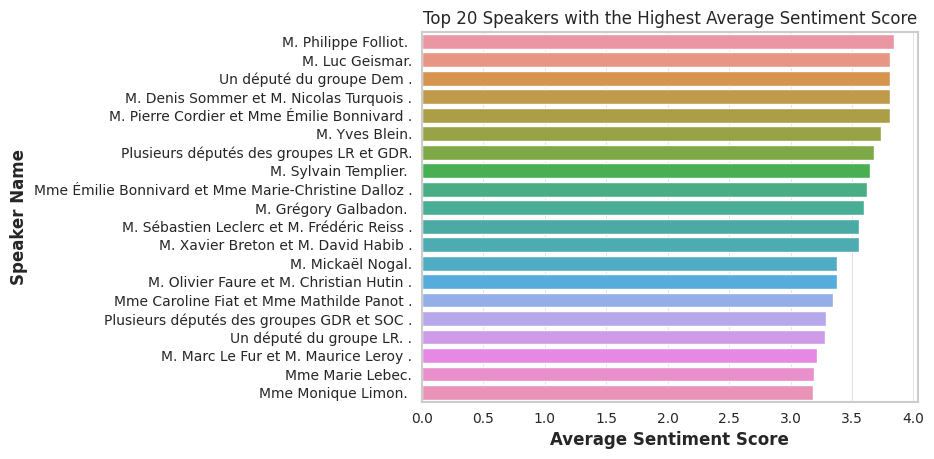

In [397]:
# Top 10 speakers with the highest average sentiment score
def plot_most_positive(sentiment_df):
  top_speakers = sentiment_df.groupby('speaker_name')['sentiment_score'].mean().sort_values(ascending=False).head(20).reset_index()

  sns.barplot(data=top_speakers, y='speaker_name', x='sentiment_score')
  plt.title('Top 20 Speakers with the Highest Average Sentiment Score')
  plt.ylabel('Speaker Name')
  plt.xlabel('Average Sentiment Score')
  # plt.xticks(rotation=45)
  plt.show()
plot_most_positive(sentiment_df)

## 20 Least positive sentiment people

In [398]:
# Top 10 speakers with the highest average sentiment score
def plot_least_positive(sentiment_df):
  top_speakers = sentiment_df.groupby('speaker_name')['sentiment_score'].mean().sort_values(ascending=True).head(20).reset_index()

  sns.barplot(data=top_speakers, y='speaker_name', x='sentiment_score')
  plt.title('20 Speakers with the Lowest Average Sentiment Score')
  plt.ylabel('Speaker Name')
  plt.xlabel('Average Sentiment Score')
  # plt.xticks(rotation=45)
  plt.show()


## Multi-speaker filtering

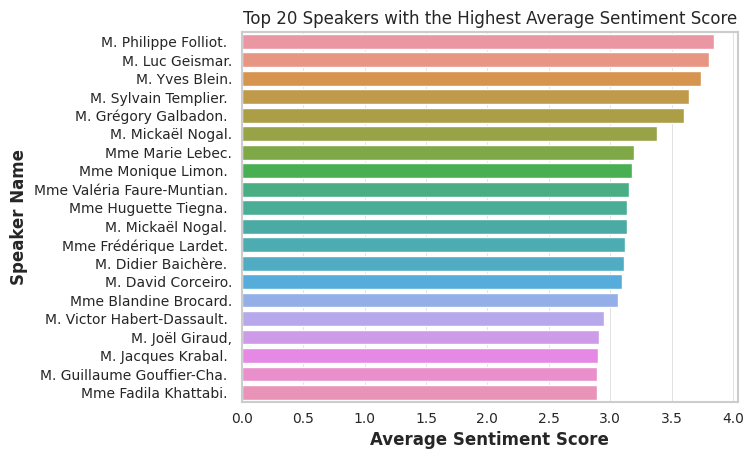

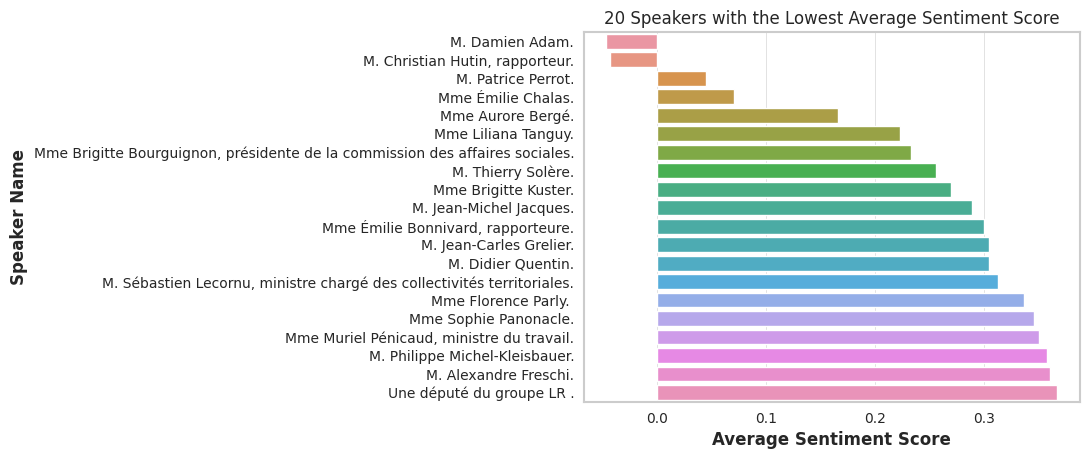

In [399]:
without_multi_speaker_sentiment_df = sentiment_df[~sentiment_df.speaker_name.str.contains(' et ')]
without_multi_speaker_sentiment_df = without_multi_speaker_sentiment_df[~without_multi_speaker_sentiment_df.speaker_name.str.contains('Plusieurs', case=False)]
without_multi_speaker_sentiment_df = without_multi_speaker_sentiment_df[~without_multi_speaker_sentiment_df.speaker_name.str.contains('un autre', case=False)]
without_multi_speaker_sentiment_df = without_multi_speaker_sentiment_df[~without_multi_speaker_sentiment_df.speaker_name.str.contains('nombreux', case=False)]
without_multi_speaker_sentiment_df = without_multi_speaker_sentiment_df[~without_multi_speaker_sentiment_df.speaker_name.str.contains('un député', case=False)]

plot_most_positive(without_multi_speaker_sentiment_df)
plot_least_positive(without_multi_speaker_sentiment_df)

## sentiment score per sentiment stars

We can see that sentiment_score measures extreme star scores: a high sentiment score will predict a 0-1 or 3-4 rating (on a score from 0 to 4).

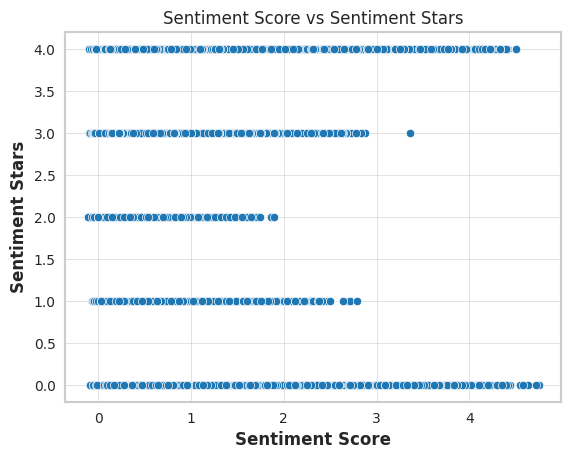

In [400]:
# Scatterplot of sentiment_score vs sentiment_stars
sns.scatterplot(data=sentiment_df, x='sentiment_score', y='sentiment_stars')
plt.title('Sentiment Score vs Sentiment Stars')
plt.xlabel('Sentiment Score')
plt.ylabel('Sentiment Stars')
plt.show()


## Most interventions

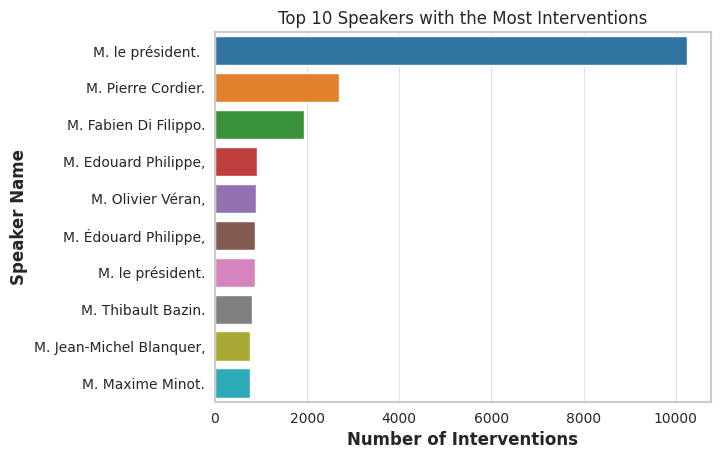

In [401]:
# Top 10 speakers with the most interventions
def plot_most_inteerventions(sentiment_df):
  top_interventions = sentiment_df['speaker_name'].value_counts().head(10).reset_index()
  top_interventions.columns = ['speaker_name', 'interventions']

  sns.barplot(data=top_interventions, y='speaker_name', x='interventions')
  plt.title('Top 10 Speakers with the Most Interventions')
  plt.ylabel('Speaker Name')
  plt.xlabel('Number of Interventions')
  # plt.xticks(rotation=45)
  plt.show()
plot_most_inteerventions(sentiment_df)

### filter out the president

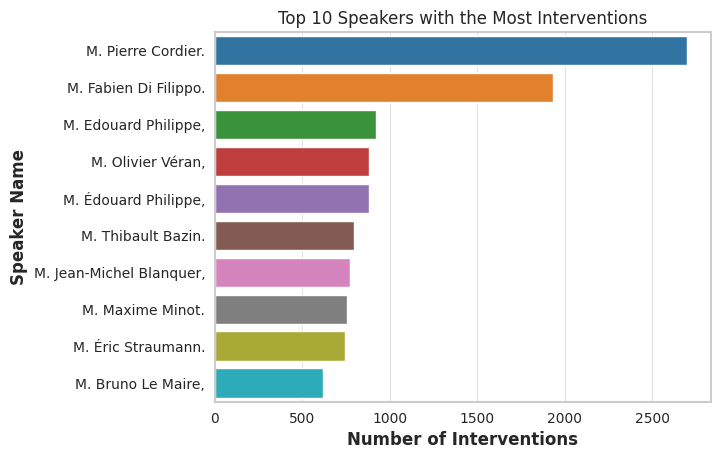

In [402]:
plot_most_inteerventions(sentiment_df[~sentiment_df.speaker_name.str.contains('président')])

## Correlation heatmap -- No correlations between variables

The variables are independent. We have 3 id keys and 2 scoring functions (sentiment_stars and sentiment_score).

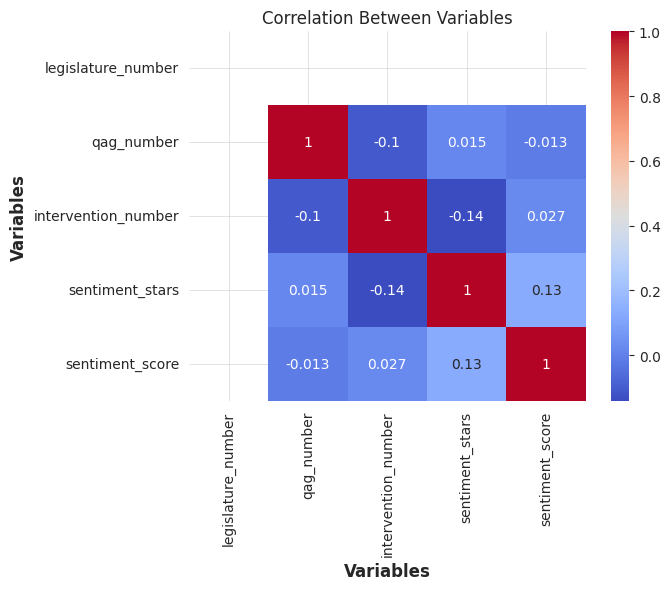

In [403]:
import seaborn as sns
import matplotlib.pyplot as plt

# compute the correlation matrix
corr = sentiment_df.corr()

# plot the heatmap using seaborn
sns.heatmap(corr, cmap='coolwarm', annot=True)

# set the title and labels for the plot
plt.title('Correlation Between Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')

# show the plot
plt.show()


In [404]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57680 entries, 0 to 10
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   legislature_number      57680 non-null  int64  
 1   official_date           57680 non-null  object 
 2   qag_number              57680 non-null  int64  
 3   intervention_number     57680 non-null  int64  
 4   speaker_name            57680 non-null  object 
 5   intervention_sentences  57680 non-null  object 
 6   sentiment_stars         57680 non-null  float64
 7   sentiment_score         57680 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 4.0+ MB


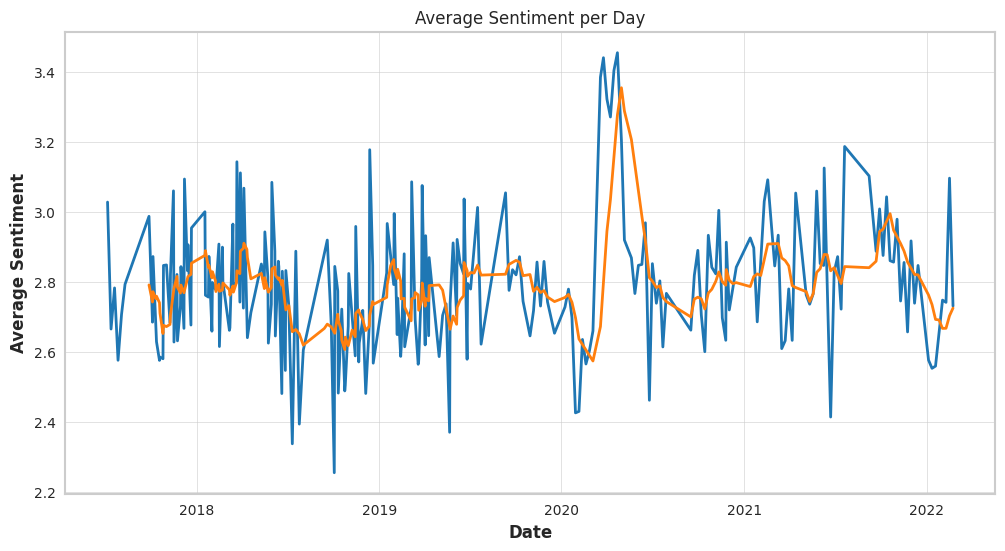

In [405]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# convert the 'official_date' column to datetime format
sentiment_df['official_date'] = pd.to_datetime(sentiment_df['official_date'], format='%d/%m/%Y')

# group the dataframe by day and calculate the mean sentiment score
sentiment_by_day = sentiment_df.groupby(['official_date'])['sentiment_stars'].mean().reset_index()

# add a rolling mean line with a window of 7 days
sentiment_by_day['rolling_mean'] = sentiment_by_day['sentiment_stars'].rolling(window=7).mean()

# set the figure size with width twice as long as the height
plt.figure(figsize=(12, 6))

# plot the line plot and rolling mean line using seaborn
sns.set_style('whitegrid')
sns.lineplot(x='official_date', y='sentiment_stars', data=sentiment_by_day)
sns.lineplot(x='official_date', y='rolling_mean', data=sentiment_by_day)

# set the title and labels for the plot
plt.title('Average Sentiment per Day')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')

# show the plot
plt.show()


## calendar

We see that most interventions are officially published on wednesday (date of the event) but are sometimes published the day after. Changing the date attribute might be a good idea if the aggregation is on a day basis. For weekly sentiment, this doesn't affect our conclusions.

In [406]:
!pip install calplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


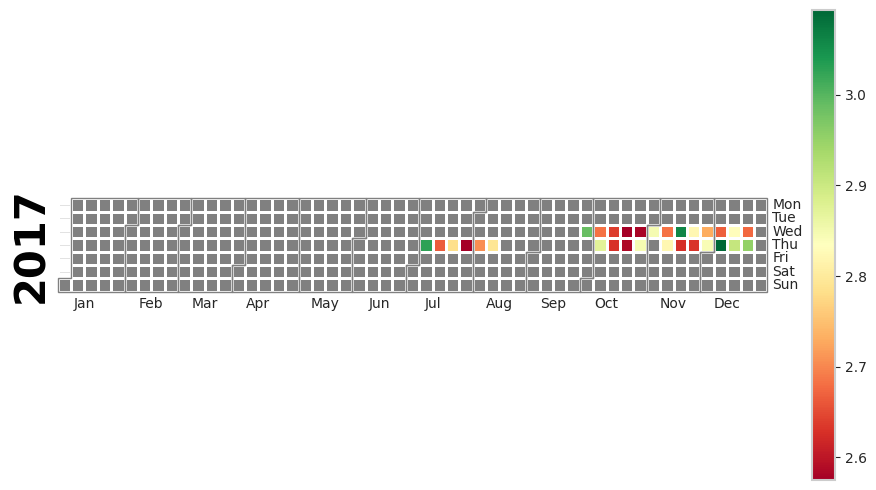

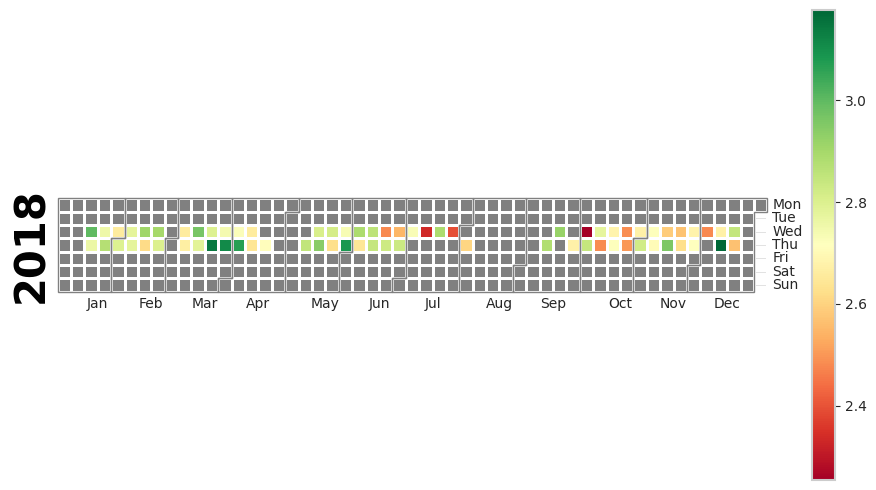

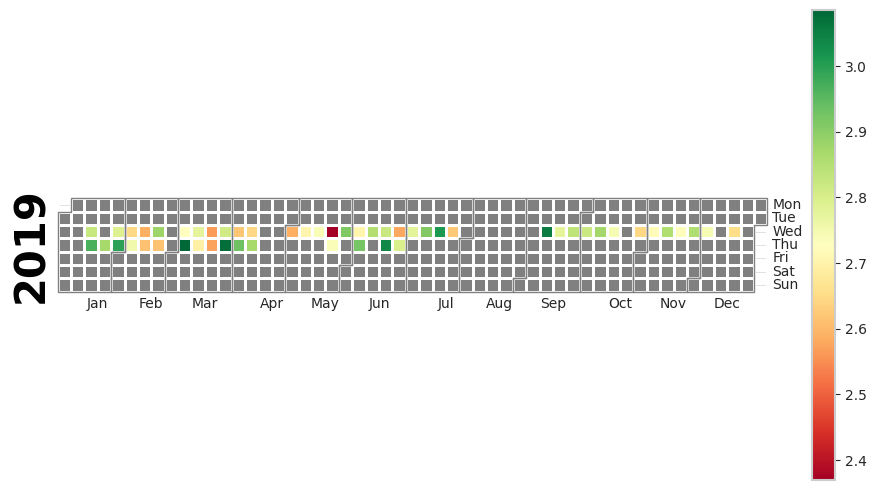

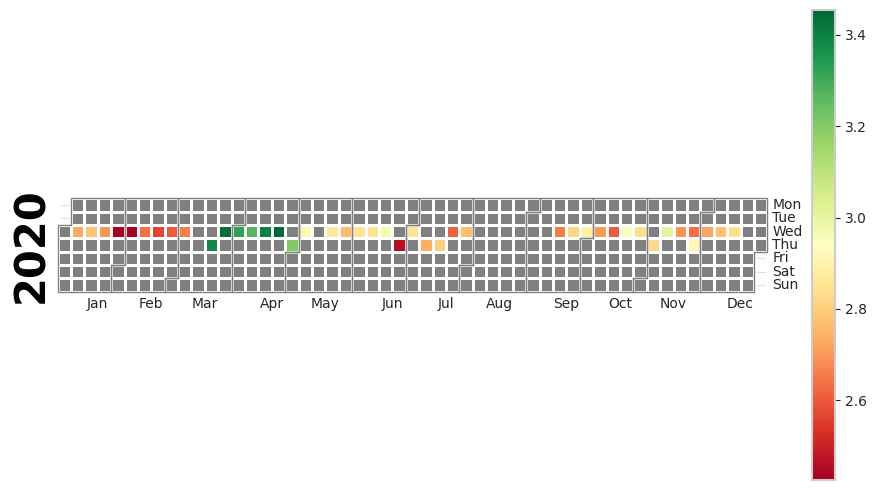

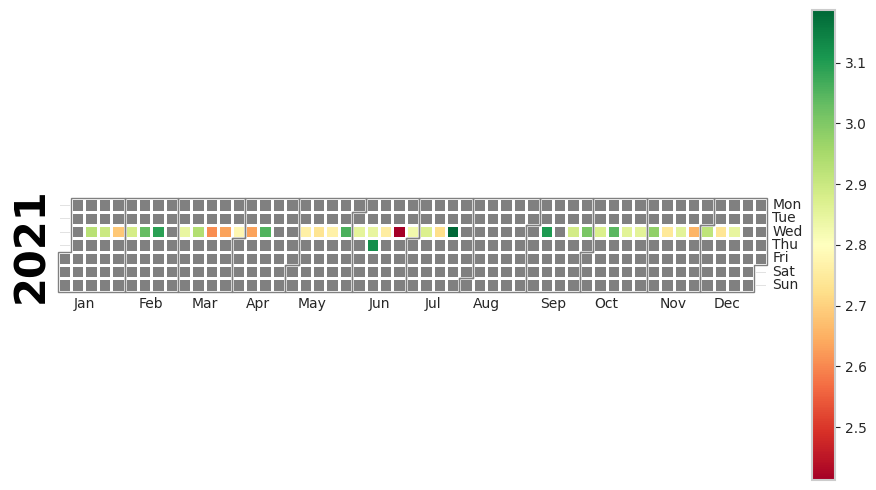

In [407]:
import pandas as pd
import calplot
import warnings
import matplotlib.pyplot as plt

# Function to display calplot for a given year
def display_calplot_for_year(year):
    # Step 1: Import necessary libraries
    # Already imported at the beginning of the script
    
    # Step 2: Read in the dataframe
    # sentiment_df = pd.read_csv('sentiment_data.csv')
    
    # Step 3: Convert official_date to a datetime object
    sentiment_df['official_date'] = pd.to_datetime(sentiment_df['official_date'])

    # Step 4: Create a new dataframe with sentiment_stars as values
    avg_sentiment_df = sentiment_df.pivot_table(index='official_date', values='sentiment_stars', aggfunc='mean')

    # Filter data by the given year
    avg_sentiment_year = avg_sentiment_df.loc[avg_sentiment_df.index.year == year, 'sentiment_stars']

    # Step 5: Create a calplot using the filtered dataframe
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        calplot.calplot(data=avg_sentiment_year, yearlabel_kws={'color': 'black'}, cmap='RdYlGn', fillcolor='grey', figsize=(10, 5))
        plt.show()

# Example: display calplot for the all years
for year in range(2017, 2022):
  display_calplot_for_year(year)

# Gender Equality analysis

## Extract gender from dataset

We take `Mme` and `M.` as gender signals, and create a `hybrid` state that is triggered by the presence of multiple speakers of multiple genders (we could have made a 0 to 1 score with harmonic gender mean, but we stick to 4 simple labels for further filtering).  
The unknown label is used to identify the samples that lack enough information. 

In the end, we find that women are underrepresented, as they are never majority speakers and seldom over 20% of all interventions are made by women.

In [408]:
import gender_guesser.detector as gender
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
import re

# Function to guess gender from speaker_name
# Male if M. Female if Mme
# Hybrid if both genders, Unknown in case of missing information
def guess_gender(name):

  # we use a complex technique here because the spaces are cursed
  # https://en.wikipedia.org/wiki/Non-breaking_space  
  ascii_name = name.encode('ascii','replace')
  ascii_name = str(ascii_name)
  female_matches = len(re.findall(r"(Mme\?)",ascii_name))
  male_matches = len(re.findall(r"(M.\?)",ascii_name))

  if male_matches and female_matches:
    return 'hybrid'
  elif male_matches:
    return 'male'
  elif female_matches:
    return 'female'
  else:
    return 'unknwon'

# Apply the function to the speaker_name column
# sentiment_df['gender'] = 
sentiment_df['gender'] = sentiment_df['speaker_name'].progress_apply(guess_gender)
sentiment_df.head()

  0%|          | 0/57680 [00:00<?, ?it/s]

,legislature_number,official_date,qag_number,intervention_number,speaker_name,intervention_sentences,sentiment_stars,sentiment_score,gender
0,15,2018-04-11,806,0,M. le président.,"La parole est à Mme Sophie Auconie, pour le gr...",4.0,0.889632,male
1,15,2018-04-11,806,1,Mme Sophie Auconie.,Madame la ministre des solidarités et de la sa...,4.0,2.656831,female
2,15,2018-04-11,806,2,Mme Danièle Obono.,Très bien !,4.0,2.782947,female
3,15,2018-04-11,806,3,Mme Sophie Auconie.,Il est temps de nous préoccuper du mal-être de...,4.0,0.780742,female
4,15,2018-04-11,806,4,M. Éric Coquerel et Mme Laurence Dumont .,Très bien !,4.0,2.782947,hybrid


There are no gender `unknown` samples so this is good news!

In [409]:
f"Number of unknown gender samples: {len(sentiment_df[sentiment_df.gender == 'unknown'])}"

'Number of unknown gender samples: 0'

There are 88 interventions with multiple speakers, and most of the time, males and females are mixed in equal quantities.  

We will not use these samples to prove gender equality as they are not pure female gender.  

In [410]:
sentiment_df[sentiment_df.gender == 'hybrid']

,legislature_number,official_date,qag_number,intervention_number,speaker_name,intervention_sentences,sentiment_stars,sentiment_score,gender
4,15,2018-04-11,806,4,M. Éric Coquerel et Mme Laurence Dumont .,Très bien !,4.0,2.782947,hybrid
7,15,2018-06-06,958,7,Mme Danièle Obono et M. Éric Coquerel .,Moins 4 milliards pour la santé !,4.0,0.120159,hybrid
7,15,2017-11-16,297,7,M. François Pupponi et Mme Valérie Rabault .,En baissant les crédits ?,1.0,0.372436,hybrid
6,15,2019-11-20,2412,6,"M. Pierre Cordier, Mme Émilie Bonnivard et Mme...",Nous ne l'acceptons pas !,0.0,2.052601,hybrid
19,15,2021-04-07,3921,19,Mme Mathilde Panot et M. Jean-Luc Mélenchon .,Et les enfants ? Répondez !,0.0,0.127521,hybrid
...,...,...,...,...,...,...,...,...,...
14,15,2017-11-01,228,14,Mme Annie Genevard et M. Jean-Pierre Vigier .,Ce n'est pas vrai !,0.0,1.353943,hybrid
14,15,2018-04-05,777,14,Mme Elsa Faucillon et M. Sébastien Jumel .,Il est de 60 % !,2.0,0.182587,hybrid
11,15,2017-10-11,137,11,M. Sébastien Jumel et Mme Sylvia Pinel .,Très bien !,4.0,2.782947,hybrid
24,15,2017-11-16,298,24,Mme Marie-Christine Dalloz et M. Daniel Fasque...,C'est vous qui avez mené les négociations !,0.0,0.349018,hybrid


## Gender repartitions of interventions

We remove the president from `gender_intervention` as the role has a masculine gender even when a woman is occupying the president role. Also, I is worth 18% of the interventions and the president role is not supposed to influence the debate.

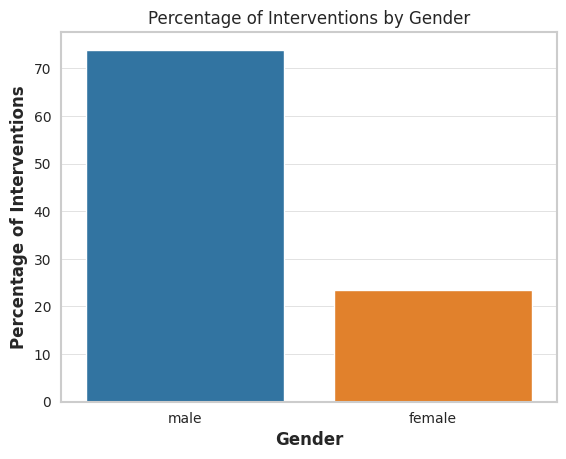

In [477]:
# Aggregate the number of interventions by gender
gender_interventions = sentiment_df[~sentiment_df.speaker_name.str.contains('président')] #remove president
gender_interventions = gender_interventions['gender'].value_counts(normalize=True).reset_index()
gender_interventions.columns = ['gender', 'interventions']

gender_interventions['interventions'] = gender_interventions['interventions'] * 100

# Filter for male and female speakers
gender_interventions = gender_interventions[gender_interventions['gender'].isin(['male', 'female'])]

# Create a seaborn plot to compare the number of interventions for men and women
sns.barplot(data=gender_interventions, x='gender', y='interventions')
plt.title('Percentage of Interventions by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Interventions')
plt.show()


In [470]:
gender_interventions = sentiment_df[~sentiment_df.speaker_name.str.contains('président')] #remove president
gender_interventions = gender_interventions[gender_interventions['gender'].isin(['male', 'female'])]

gender_interventions[['speaker_name', 'gender']].drop_duplicates()

,speaker_name,gender
1,Mme Sophie Auconie.,female
2,Mme Danièle Obono.,female
7,"Mme Agnès Buzyn,",female
8,Mme Sophie Auconie.,female
1,M. Jean-Louis Masson.,male
...,...,...
20,M. Philippe Gosselin et M. Marc Le Fur .,male
4,Mme Valérie Thomas.,female
4,M. Pierre Cordier et M. Pierre-Henri Dumont .,male
8,M. Joaquim Pueyo.,male


We see in the pie chart below that women represent around 25% of the speakers, and account for 25% of interventions (once the president is removed), which shows that they contribute at the same rate (as a group) than men.  

Text(0.5, 1.0, 'Gender Distribution of Speakers')

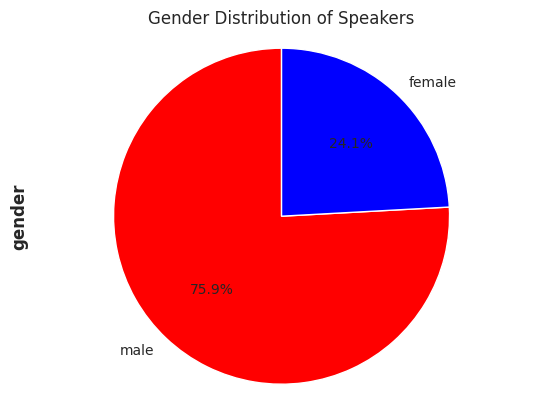

In [473]:
# Count the number of speakers of each gender
gender_counts = gender_interventions['gender'].value_counts()

# Create the pie chart
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
plt.axis('equal')
plt.title('Gender Distribution of Speakers')

# Get male interventions percentage in QAG

Extract Pure Male and Pure Female interventions (filter-out hybrid and unknown).  
Groupby qag_number with mean of is_male to get a percentage of male interventions. 

In [418]:
import pandas as pd

gender_corrected_df = sentiment_df[sentiment_df.gender.isin(['male', 'female'])]
gender_corrected_df = gender_corrected_df[~gender_corrected_df.speaker_name.str.contains('président')]

# Create the new column is_male
gender_corrected_df['male_intervention_percentage'] = gender_corrected_df['gender'].apply(lambda x: True if x == 'male' else False)

# Aggregate on qag_number and official_date to get the male to female ratio
male_female_ratio = gender_corrected_df.groupby(['qag_number', 'official_date'])['male_intervention_percentage'].mean()

# Reset the index to get the 'qag_number' and 'official_date' columns as regular columns
male_female_ratio = male_female_ratio.reset_index()

# Print the resulting dataframe
male_female_ratio.head()

,qag_number,official_date,male_intervention_percentage
0,1,2017-07-06,1.000000
1,2,2017-07-06,0.857143
2,3,2017-07-06,0.500000
3,4,2017-07-06,0.500000
4,5,2017-07-06,0.714286


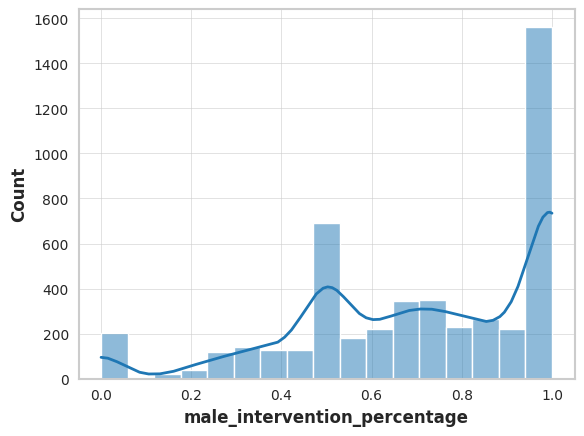

In [420]:
sns.histplot(data=male_female_ratio, x='male_intervention_percentage', kde=True)
plt.show()

In [426]:
male_female_ratio['women_ratio'] = 1- male_female_ratio['male_intervention_percentage']
male_female_ratio.head()

,qag_number,official_date,male_intervention_percentage,women_ratio
0,1,2017-07-06,1.000000,0.000000
1,2,2017-07-06,0.857143,0.142857
2,3,2017-07-06,0.500000,0.500000
3,4,2017-07-06,0.500000,0.500000
4,5,2017-07-06,0.714286,0.285714


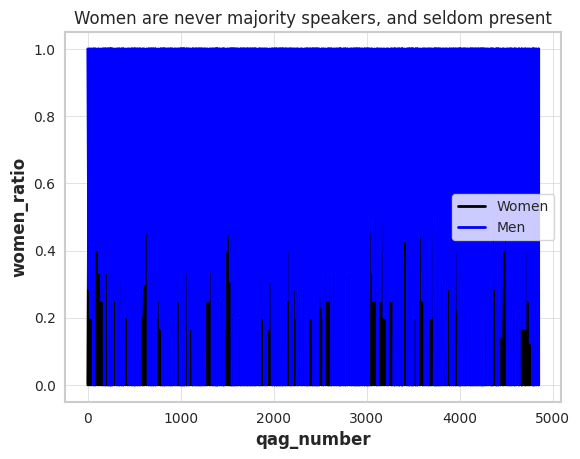

In [444]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
# male_female_ratio = pd.read_csv('your_file.csv')

# Create the seaborn plot with men in blue and women in pink
sns.lineplot(data=male_female_ratio, x='qag_number', y='women_ratio', color='black', label='Women')
sns.lineplot(data=male_female_ratio, x='qag_number', y='male_intervention_percentage', color='blue', label='Men')

# Add a legend to the plot
plt.legend()
plt.title('Women are never majority speakers, and seldom present')

# Show the plot
plt.show()

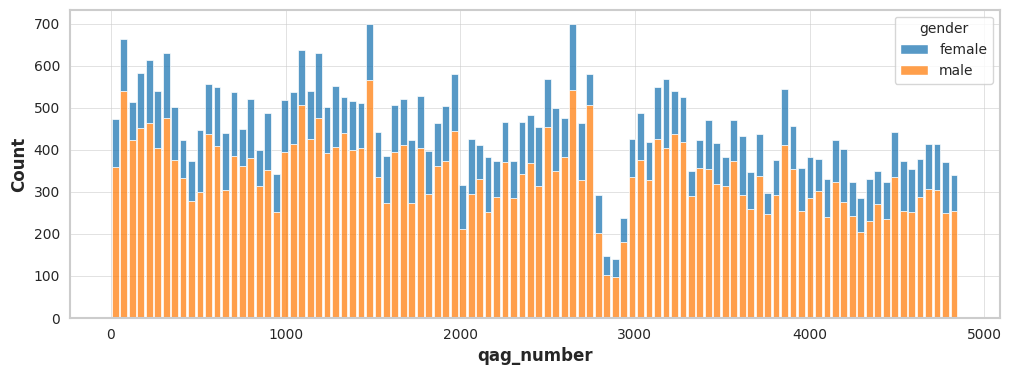

In [452]:
# Create the seaborn plot with men in blue and women in pink
gender_corrected_df = sentiment_df[sentiment_df.gender.isin(['male', 'female'])]
gender_corrected_df = gender_corrected_df[~gender_corrected_df.speaker_name.str.contains('président')]

fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data=gender_corrected_df, x='qag_number', hue='gender', multiple='stack', shrink=0.8, bins=100, ax=ax)

# Show the plot
plt.show()

## Male intervention percentage per date

Same results, large men majority.

In [459]:
import pandas as pd

gender_corrected_df = sentiment_df[sentiment_df.gender.isin(['male', 'female'])]
gender_corrected_df = gender_corrected_df[~gender_corrected_df.speaker_name.str.contains('président')]

# Create the new column is_male
gender_corrected_df['male_intervention_percentage'] = gender_corrected_df['gender'].apply(lambda x: True if x == 'male' else False)

# Aggregate on qag_number and official_date to get the male to female ratio
male_female_ratio = gender_corrected_df.groupby(['official_date'])['male_intervention_percentage'].mean()

# Reset the index to get the 'qag_number' and 'official_date' columns as regular columns
male_female_ratio = male_female_ratio.reset_index()
male_female_ratio['women_ratio'] = 1- male_female_ratio['male_intervention_percentage']
male_female_ratio.head()

,official_date,male_intervention_percentage,women_ratio
0,2017-07-06,0.807339,0.192661
1,2017-07-13,0.768657,0.231343
2,2017-07-20,0.730000,0.270000
3,2017-07-27,0.825581,0.174419
4,2017-08-03,0.833333,0.166667


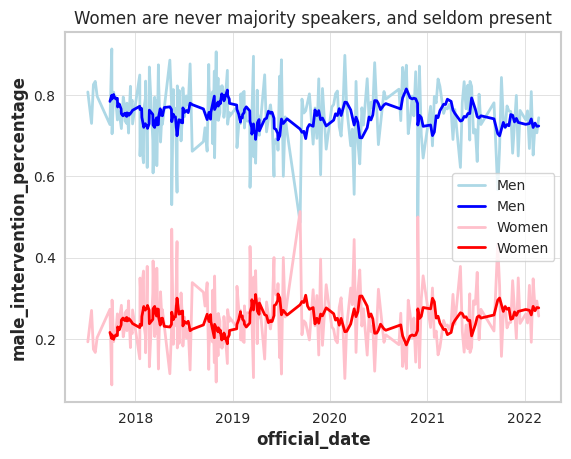

In [464]:
import seaborn as sns
import matplotlib.pyplot as plt

# moving average for male_intervention_percentage and women_ratio
window_size = 7 # set the window size for the moving average
male_female_ratio['male_ma'] = male_female_ratio['male_intervention_percentage'].rolling(window_size).mean()
male_female_ratio['women_ma'] = male_female_ratio['women_ratio'].rolling(window_size).mean()

# Create the seaborn plot with men in blue and women in pink
sns.lineplot(data=male_female_ratio, x='official_date', y='male_intervention_percentage', color='lightblue', label='Men')
sns.lineplot(data=male_female_ratio, x='official_date', y='male_ma', color='blue', label='Men')

# Create the seaborn plot with men in blue and women in pink
sns.lineplot(data=male_female_ratio, x='official_date', y='women_ratio', color='pink', label='Women')
sns.lineplot(data=male_female_ratio, x='official_date', y='women_ma', color='red', label='Women')

# Add a legend to the plot
plt.legend()
plt.title('Women are never majority speakers, and seldom present')

# Show the plot
plt.show()

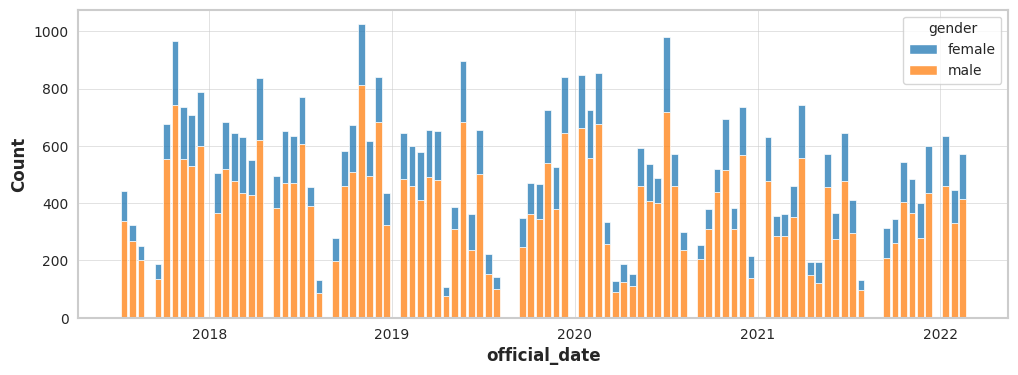

In [455]:
# Create the seaborn plot with men in blue and women in pink
gender_corrected_df = sentiment_df[sentiment_df.gender.isin(['male', 'female'])]
gender_corrected_df = gender_corrected_df[~gender_corrected_df.speaker_name.str.contains('président')]

fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data=gender_corrected_df, x='official_date', hue='gender', multiple='stack', shrink=0.8, bins=100, ax=ax)

# Show the plot
plt.show()

# Sentiment per gender

In [478]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57680 entries, 0 to 10
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   legislature_number            57680 non-null  int64         
 1   official_date                 57680 non-null  datetime64[ns]
 2   qag_number                    57680 non-null  int64         
 3   intervention_number           57680 non-null  int64         
 4   speaker_name                  57680 non-null  object        
 5   intervention_sentences        57680 non-null  object        
 6   sentiment_stars               57680 non-null  float64       
 7   sentiment_score               57680 non-null  float64       
 8   gender                        57680 non-null  object        
 9   male_intervention_percentage  57680 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 4.5+ MB


## Violin plot - Polarized sentiment with 0 star men

We see that the low sentiment is growing, and a also a growing divide between positive and negative sentiment. Could be due to a mode bias, or extreme polarization in the debate.  

What we can observe is the growing number of 0-to-1-star women, a category historically dominated by men. 

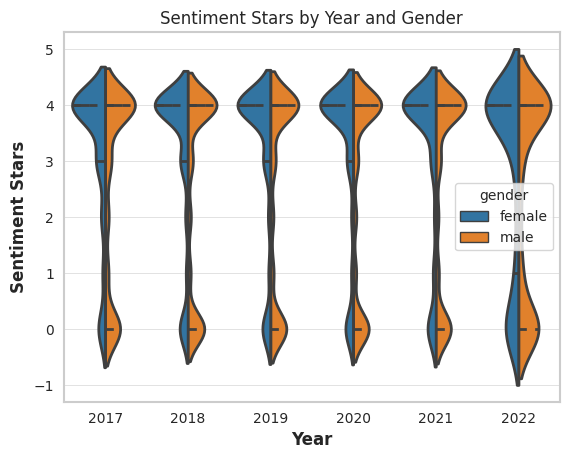

In [482]:
import seaborn as sns
import matplotlib.pyplot as plt

gender_corrected_df = sentiment_df[sentiment_df.gender.isin(['male', 'female'])]
gender_corrected_df = gender_corrected_df[~gender_corrected_df.speaker_name.str.contains('président')]


# Extract year from official_date
gender_corrected_df['year'] = gender_corrected_df['official_date'].dt.year

# Create violin plot split on gender
sns.violinplot(data=gender_corrected_df, y='sentiment_stars', x='year', hue='gender', split=True, inner='quartile')

# Add title and axis labels
plt.title("Sentiment Stars by Year and Gender")
plt.ylabel("Sentiment Stars")
plt.xlabel("Year")

# Show the plot
plt.show()


## Top 100 sentiment scores per gender

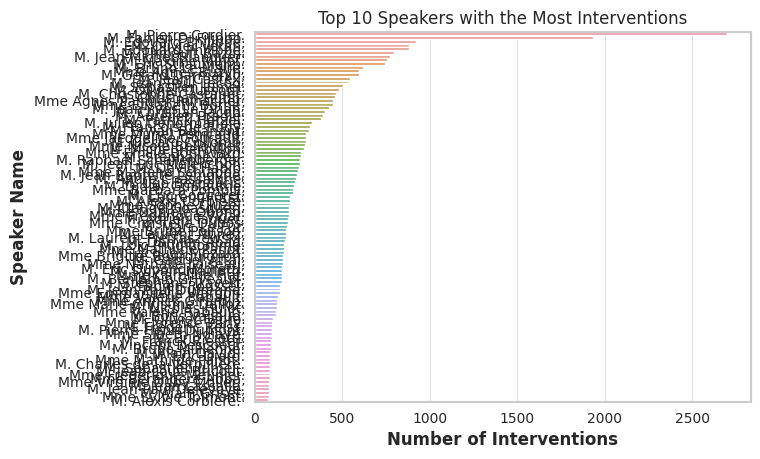

In [483]:
# Top 10 speakers with the most interventions

gender_corrected_df = sentiment_df[sentiment_df.gender.isin(['male', 'female'])]
gender_corrected_df = gender_corrected_df[~gender_corrected_df.speaker_name.str.contains('président')]

top_interventions = gender_corrected_df['speaker_name'].value_counts().head(100).reset_index()
top_interventions.columns = ['speaker_name', 'interventions']

sns.barplot(data=top_interventions, y='speaker_name', x='interventions')
plt.title('Top 10 Speakers with the Most Interventions')
plt.ylabel('Speaker Name')
plt.xlabel('Number of Interventions')
# plt.xticks(rotation=45)
plt.show()

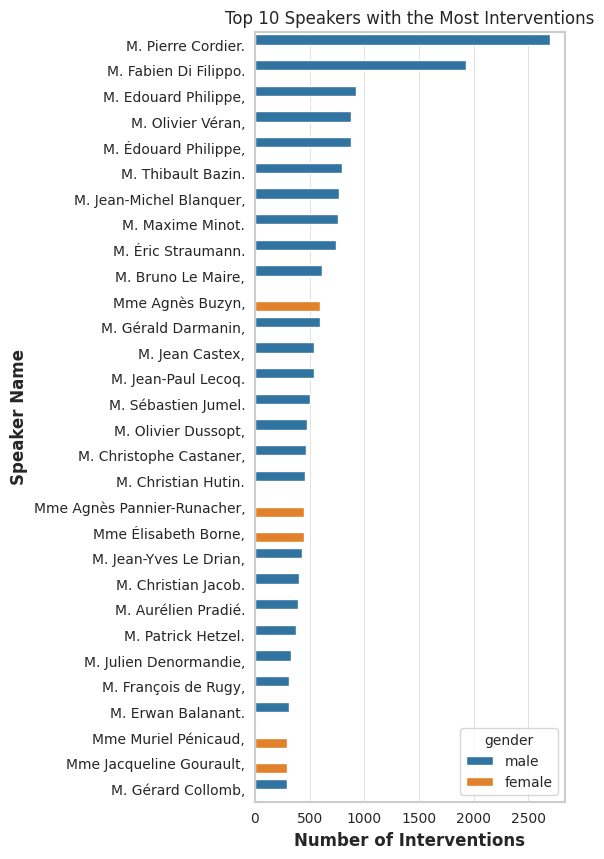

In [490]:
# Top 10 speakers with the most interventions

gender_corrected_df = sentiment_df[sentiment_df.gender.isin(['male', 'female'])]
gender_corrected_df = gender_corrected_df[~gender_corrected_df.speaker_name.str.contains('président')]

top_interventions = gender_corrected_df['speaker_name'].value_counts().head(30).reset_index()
top_interventions.columns = ['speaker_name', 'interventions']

# Merge with the original DataFrame to get gender information
top_interventions = top_interventions.merge(sentiment_df[['speaker_name', 'gender']], on='speaker_name')

fig, ax = plt.subplots(figsize=(4, 10))  # set the size of the plot

sns.barplot(data=top_interventions, y='speaker_name', x='interventions', hue='gender')
plt.title('Top 10 Speakers with the Most Interventions')
plt.ylabel('Speaker Name')
plt.xlabel('Number of Interventions')
# plt.xticks(rotation=45)
plt.show()


# Pixels for gender -- Women are less likely to have a low sentiment score

In [506]:
gender_corrected_df = sentiment_df[sentiment_df.gender.isin(['male', 'female'])]
gender_corrected_df = gender_corrected_df[~gender_corrected_df.speaker_name.str.contains('président')]
gender_corrected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 10
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   legislature_number            45069 non-null  int64         
 1   official_date                 45069 non-null  datetime64[ns]
 2   qag_number                    45069 non-null  int64         
 3   intervention_number           45069 non-null  int64         
 4   speaker_name                  45069 non-null  object        
 5   intervention_sentences        45069 non-null  object        
 6   sentiment_stars               45069 non-null  float64       
 7   sentiment_score               45069 non-null  float64       
 8   gender                        45069 non-null  object        
 9   male_intervention_percentage  45069 non-null  bool          
 10  year                          45069 non-null  int64         
dtypes: bool(1), datetime64[ns](1), 

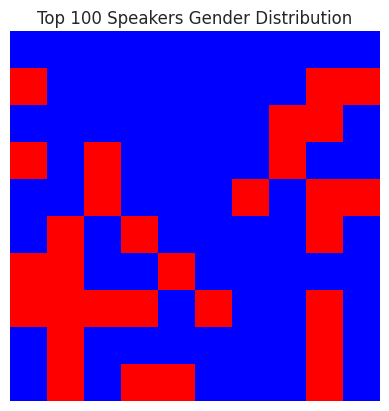

In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_top_n_square(n):
  # Assuming gender_corrected_df is already defined.
  # 1. Group the dataframe by 'speaker_name' and aggregate by the count of interventions.
  grouped_df = gender_corrected_df.groupby('speaker_name')['intervention_number'].count().reset_index()

  # 2. Sort the aggregated dataframe by the number of interventions in descending order.
  sorted_df = grouped_df.sort_values('intervention_number', ascending=False)

  # 3. Select the top 100 speakers.
  top_100_speakers = sorted_df.head(n*n)

  # 4. Merge the aggregated top 100 speakers dataframe with the original dataframe.
  merged_df = top_100_speakers.merge(gender_corrected_df[['speaker_name', 'gender']], on='speaker_name').drop_duplicates()

  # 5. Initialize an empty 10x10 grid to store the color information.
  color_grid = np.zeros((n, n, 3), dtype=np.uint8)

  # 6. Iterate through the top 100 speakers.
  for i, (_, speaker_row) in enumerate(merged_df.iterrows()):
      x, y = i % n, i // n
      # a. Check the gender of the speaker.
      if speaker_row['gender'] == 'female':
          # b. If the gender is female, set the pixel color to red.
          color_grid[y, x] = [255, 0, 0]
      else:
          # b. If the gender is male, set the pixel color to blue.
          color_grid[y, x] = [0, 0, 255]

  # 7. Visualize the grid using the matplotlib library.
  plt.imshow(color_grid)
  plt.title(f'Top {n*n} Speakers Gender Distribution')
  plt.axis('off')
  plt.show()
get_top_n_square(10)

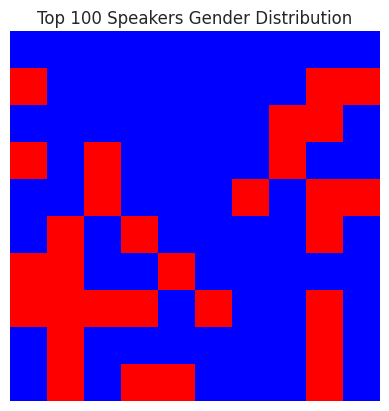

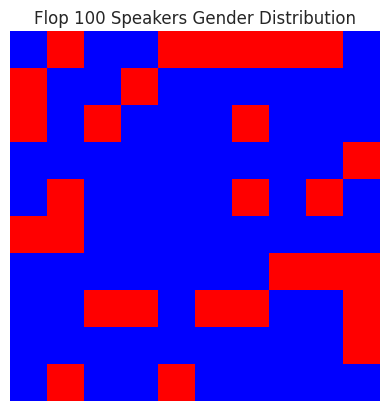

(None, None)

In [534]:
def get_flop_n_square(n):
  # Assuming gender_corrected_df is already defined.
  # 1. Group the dataframe by 'speaker_name' and aggregate by the count of interventions.
  grouped_df = gender_corrected_df.groupby('speaker_name')['intervention_number'].count().reset_index()

  # 2. Sort the aggregated dataframe by the number of interventions in descending order.
  sorted_df = grouped_df.sort_values('intervention_number', ascending=True)

  # 3. Select the top 100 speakers.
  top_100_speakers = sorted_df.head(n*n)

  # 4. Merge the aggregated top 100 speakers dataframe with the original dataframe.
  merged_df = top_100_speakers.merge(gender_corrected_df[['speaker_name', 'gender']], on='speaker_name').drop_duplicates()

  # 5. Initialize an empty 10x10 grid to store the color information.
  color_grid = np.zeros((n, n, 3), dtype=np.uint8)

  # 6. Iterate through the top 100 speakers.
  for i, (_, speaker_row) in enumerate(merged_df.iterrows()):
      x, y = i % n, i // n
      # a. Check the gender of the speaker.
      if speaker_row['gender'] == 'female':
          # b. If the gender is female, set the pixel color to red.
          color_grid[y, x] = [255, 0, 0]
      else:
          # b. If the gender is male, set the pixel color to blue.
          color_grid[y, x] = [0, 0, 255]

  # 7. Visualize the grid using the matplotlib library.
  plt.imshow(color_grid)
  plt.title(f'Flop {n*n} Speakers Gender Distribution')
  plt.axis('off')
  plt.show()
get_top_n_square(10), get_flop_n_square(10)

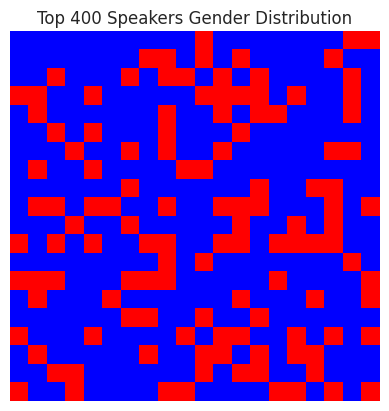

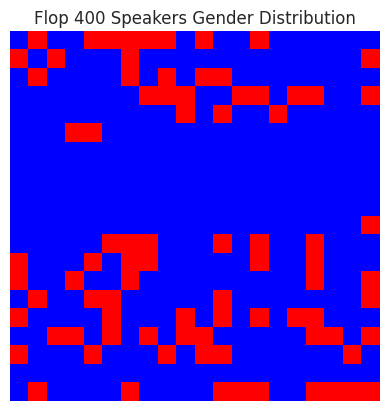

(None, None)

In [535]:
get_top_n_square(20), get_flop_n_square(20)

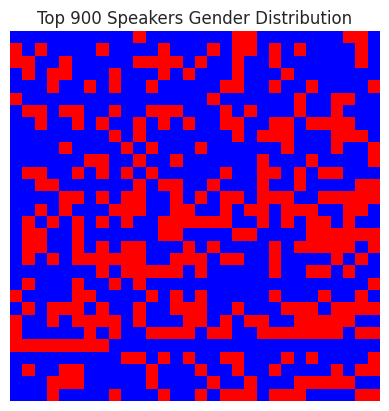

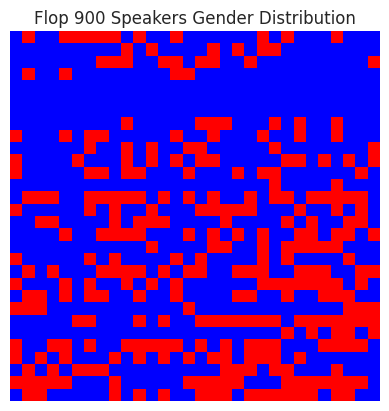

(None, None)

In [536]:
get_top_n_square(30), get_flop_n_square(30)